## **一、实验目的**
Kmeans是一种无监督的机器学习方法，用于把数据分成k个类簇。
本实验首先安装配置好Anaconda以及Python环境，通过在一个二维数组上用K-Means算法实现聚类操作，从而使同学们了解K-Means算法的原理并学会将其运用到实践中。


## **二、实验平台**

1. 操作系统：Windows10；
2. Anaconda 版本：5.3.0； 
3. Python 版本：3.6.8；
4. matplotlib包；
5. sklearn包；

## **三、实验内容**

示例：下面给出一个使用scikit-learn软件包实现对一个二维数组进行K-Means聚类并用matplotlib软件包进行可视化的实例。 

实验实例:  
二维数据集：  
x1 = [3, 1, 1, 2, 1, 6, 6, 6, 5, 6, 7, 8, 9, 8, 9, 9, 8]  
y1 = [5, 4, 6, 6, 5, 8, 6, 7, 6, 7, 1, 2, 1, 2, 3, 2, 3]

使用matplotlib对这个二维数据集进行可视化：

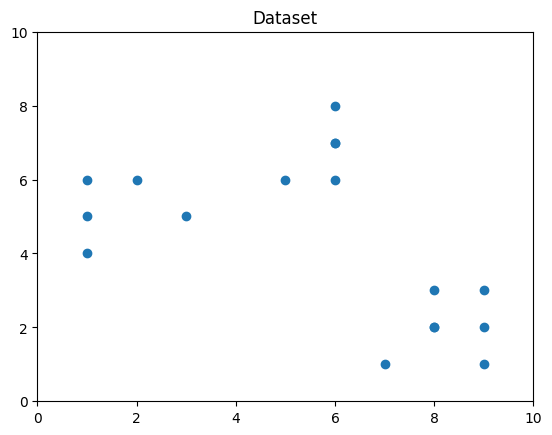

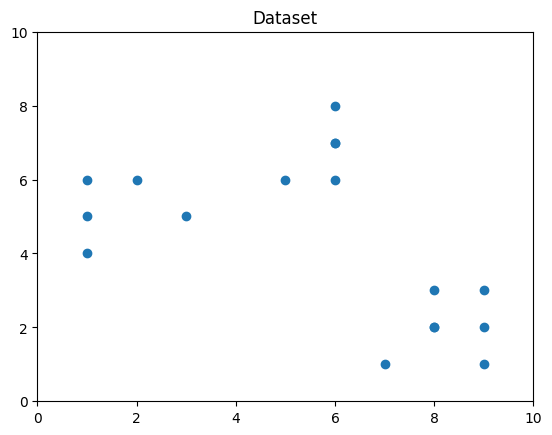

In [2]:
# clustering dataset
import numpy as np
import matplotlib.pyplot as plt
 
x1 = np.array([3, 1, 1, 2, 1, 6, 6, 6, 5, 6, 7, 8, 9, 8, 9, 9, 8])
x2 = np.array([5, 4, 6, 6, 5, 8, 6, 7, 6, 7, 1, 2, 1, 2, 3, 2, 3])

#visualize the data
plt.plot()
plt.xlim([0, 10])
plt.ylim([0, 10])
plt.title('Dataset')
plt.scatter(x1, x2)
plt.show()

可以明显看到三个类簇，所以我们选择k为3。运行K-means算法，对数据进行聚类

[[3 5]
 [1 4]
 [1 6]
 [2 6]
 [1 5]
 [6 8]
 [6 6]
 [6 7]
 [5 6]
 [6 7]
 [7 1]
 [8 2]
 [9 1]
 [8 2]
 [9 3]
 [9 2]
 [8 3]]
[(0, 2), (1, 2), (2, 2), (3, 2), (4, 2), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 0), (11, 0), (12, 0), (13, 0), (14, 0), (15, 0), (16, 0)]


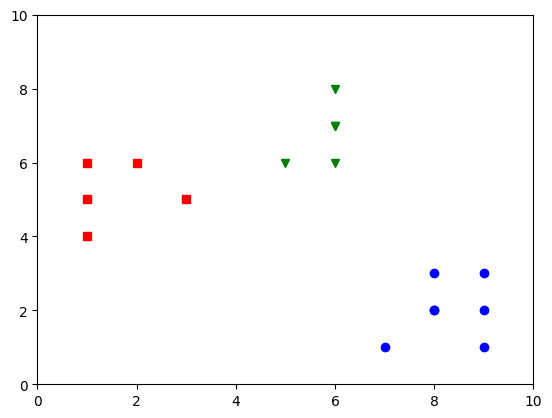

In [3]:
import numpy as np
from sklearn.cluster import KMeans
X = np.array(list(zip(x1, x2))).reshape(len(x1), 2).astype(np.int64) #把两个数据整合成一个n行2列的数组
print(X)
colors = ['b', 'g', 'r']
markers = ['o', 'v', 's']
# KMeans algorithm
K = 3
kmeans_model = KMeans(n_clusters=K).fit(X)
print(list(enumerate(kmeans_model.labels_)))

plt.plot()
for i, l in enumerate(kmeans_model.labels_):
    plt.plot(x1[i], x2[i], color=colors[l], marker=markers[l],ls='None')
    plt.xlim([0, 10])
    plt.ylim([0, 10])
plt.show()

运行结果可以看到，kmeans算法较好地对数据进行了聚类。  
print(kmeans_model.labels_)的输出结果是[1 1 1 1 1 2 2 2 2 2 0 0 0 0 0 0 0]表示各个数据点的类簇标签。  
print(list(enumerate(kmeans_model.labels_)))输出[(0, 2), (1, 2), (2, 2), (3, 2), (4, 2), (5, 0), (6, 0), (7, 0), (8, 0), (9, 0), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1)]，每个元素的两个分量分别对应列表的下标和对应的类簇标签。 


**备注：对于某些语句的运行结果不了解，不熟悉，可以把它print出来，就知道它是干什么的了。这也是学习的好方法。**

### **Determine optimal k**
这里给出的方法为elbow方法。  
它的基本原理是尝试各个k值，一般为数据点数的开根方，即n的开根方，尝试n附近的一些数值。  
把各个类簇用中心点来替代，把各个类簇的点和中心点的距离累加起来，称为扭曲值distortion，也就是误差。  
把尝试的k作为横坐标，扭曲值作为纵坐标。  
当k不断增大的时候，也就是类簇数量不断增加，那么各个数据点到类簇中心点越来越近，误差越来越小。我们增加k，总能降低扭曲值，在某个k值，出现拐点。  
相关的代码如下，


D:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


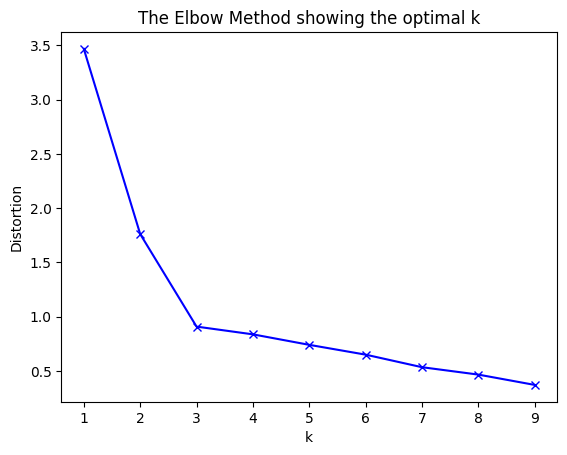

In [4]:
# create new plot and data
from scipy.spatial.distance import cdist
plt.plot()
X = np.array(list(zip(x1, x2))).reshape(len(x1), 2)
colors = ['b', 'g', 'r']
markers = ['o', 'v', 's']
 
# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])


 
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()


D:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


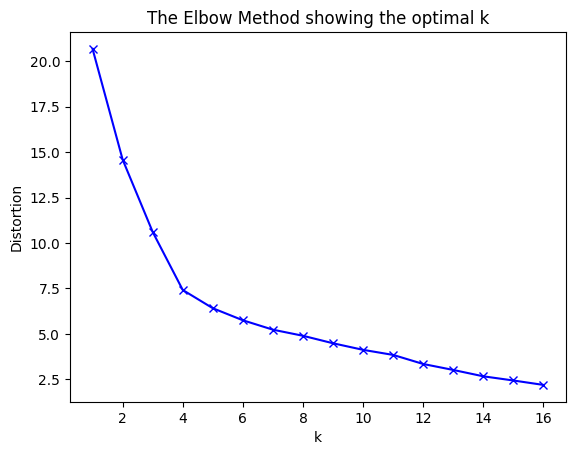

In [5]:
x1 = np.array([39,9,11,44,14,8,25,0,12,45,30,32,45,15,15,6,6,46,39,13,47,1,9,17,38,34,25,2,37,9])
x2 = np.array([19,41,43,35,6,36,4,13,34,38,13,25,44,14,44,10,6,45,2,19,48,29,49,45,13,18,44,39,26,27])
X=np.array(list(zip(x1,x2))).reshape(len(x1),2)
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
plt.plot()
colors = ['b', 'g', 'r']
markers = ['o', 'v', 's']
# k means determine k
distortions = []
K = range(1,17)
for k in K:
    kmeans_model2=KMeans(n_clusters=k)
    kmeans_model2.fit(X)
    distortions.append(sum(np.min(cdist(X,kmeans_model2.cluster_centers_,'euclidean'),axis=1))/X.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

图上出现的拐点对应的k，就是最优的k值。比如在本例中，当k等于3的时候，出现拐点，k>3的时候，扭曲值的下降不再很明显。

## **四、实验要求**

(1)运行实验大纲中给出的实例，并弄懂整个代码流程。  
(2)将例子中的K-Means算法实现出来，即自己写一个K-Means算法（不可调sklearn.cluster.KMeans库）。对以下二维数据集运用K-Means算法进行聚类并选出最优的K值，最后将最优K值对应的聚类结果使用matplotlib数据包进行可视化输出。另外，在实验报告中对关键语句加以注释。  

二维数据集：  
**[39,9,11,44,14,8,25,0,12,45,30,32,45,15,15,6,6,46,39,13,47,1,9,17,38,34,25,2,37,9]  
[19,41,43,35,6,36,4,13,34,38,13,25,44,14,44,10,6,45,2,19,48,29,49,45,13,18,44,39,26,27]**

考查方式：给助教看运行结果，助教提问有关实验实例或自己编写的代码的相关问题。  

**PS:下面给出K-means算法实现框架参考，算法核心部分已挖空待填**


In [14]:
#K-means算法实现
import numpy as np


# 欧氏距离计算
def distEclud(x, y):
    return np.sqrt(np.sum((x - y) ** 2))  # 计算欧氏距离


# 为给定数据集构建一个包含K个随机质心的集合。
def randCent(dataSet, k):
    np.random.seed(0)#使得随机数据可预测，当我们设置相同的seed，每次生成的随机数相同，这里是为了方便验收结果
    """
    待填空 
   PS：可用np.random.choice(listA,k,replace=False) 从listA中随机出不重复的k个index
   注意：为了对应下面的程序，这里centroids中的每个质心应返回二维position，而不是index
   
   """

    centroids_choice=np.random.choice(dataSet.shape[0],k,replace=False)
    centroids=dataSet[centroids_choice,:]
    return centroids


# k均值聚类
def KMeans(dataSet, k):
    m = np.shape(dataSet)[0]  # 行的数目
    # 第一列存样本属于哪一簇
    # 第二列存样本的到簇的中心点的误差
    clusterAssment = np.mat(np.zeros((m, 2)))
    clusterChange = True

    # 第1步 初始化centroids
    centroids = randCent(dataSet, k)
    while clusterChange:
        clusterChange = False

        # 遍历所有的样本（行数）
        for i in range(m):
            minDist = 100000.0
            minIndex = -1

            # 遍历所有的质心
            # 第2步 找出最近的质心
            for j in range(k):
                """
                待填空:
                计算该样本到质心的欧式距离
                更新minDist & minIndex
                """
                dis=distEclud(centroids[j,:],dataSet[i,:])
                if dis<minDist:
                    minDist=dis
                    minIndex=j
            # 第 3 步：更新每一行样本所属的簇
            if clusterAssment[i, 0] != minIndex:
                """
                待填空:
                更新每一样本所属的簇clusterAssment
                判断是否clusterChange->是否要继续循环
                """
                clusterAssment[i,0]=minIndex
                clusterAssment[i,1]=minDist**2
                clusterChange=True


        # 第 4 步：更新质心：
        for j in range(k):
            """
            待填空:
            获取簇类所有的点
            对类中所有点求均值更新质心
            """
            pointsInCluster = dataSet[np.nonzero(clusterAssment[:, 0] == j)[0]]
            if len(pointsInCluster) > 0:
                # 对类中所有点求均值更新质心
                centroids[j, :] = np.mean(pointsInCluster, axis=0)

    print("Congratulations,cluster complete!")
    return centroids, clusterAssment

x1 = np.array([39,9,11,44,14,8,25,0,12,45,30,32,45,15,15,6,6,46,39,13,47,1,9,17,38,34,25,2,37,9])
x2 = np.array([19,41,43,35,6,36,4,13,34,38,13,25,44,14,44,10,6,45,2,19,48,29,49,45,13,18,44,39,26,27])
X=np.array(list(zip(x1,x2))).reshape(len(x1),2)


Congratulations,cluster complete!
Congratulations,cluster complete!
Congratulations,cluster complete!
Congratulations,cluster complete!
Congratulations,cluster complete!
Congratulations,cluster complete!
Congratulations,cluster complete!
Congratulations,cluster complete!
Congratulations,cluster complete!
Congratulations,cluster complete!
Congratulations,cluster complete!
Congratulations,cluster complete!
Congratulations,cluster complete!
Congratulations,cluster complete!
Congratulations,cluster complete!
Congratulations,cluster complete!
Congratulations,cluster complete!
Congratulations,cluster complete!
Congratulations,cluster complete!


([<matplotlib.axis.XTick at 0x236464ad790>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

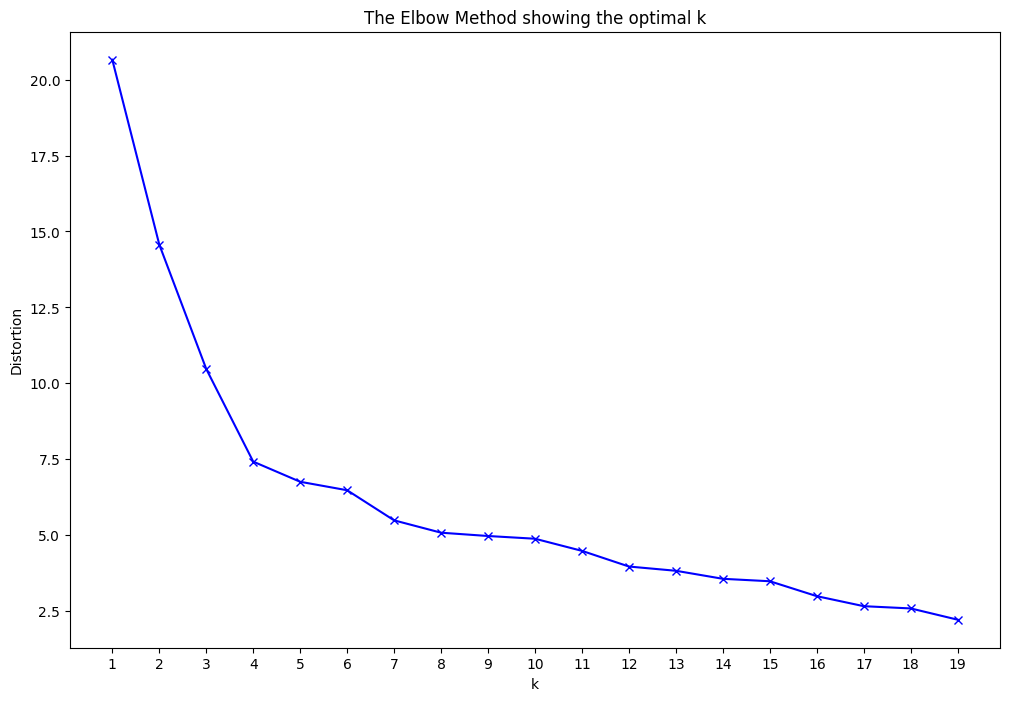

In [15]:
# 找到最优K值
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
colors = ['b', 'g', 'r']
markers = ['o', 'v', 's']
# k means determine k
distortions = []
K = range(1,20)
for k in K:
    centroids, clusterAssment = KMeans(X, k)#自己实现的K-means
    distortions.append(sum(np.min(cdist(X, centroids, 'euclidean'), axis=1)) / X.shape[0])

# Plot the elbow
plt.figure(figsize=(12,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.xticks(list(range(1,20)))

Congratulations,cluster complete!


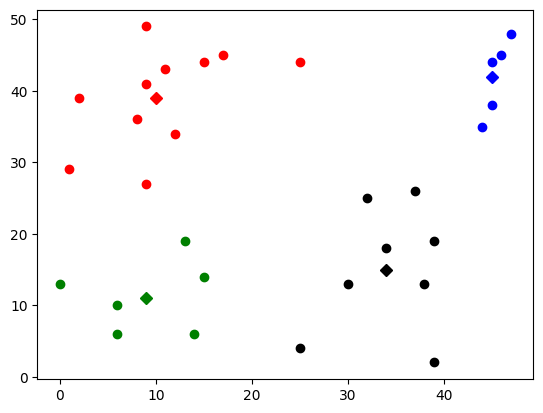

In [16]:
#展示最优K值对应的可视化结果
def showCluster(dataSet, k, centroids, clusterAssment):
    m, n = dataSet.shape

    mark = ['or', 'ob', 'og', 'ok', '^r', '+r', 'sr', 'dr', '<r', 'pr']
    if k > len(mark):
        print("k值超出表示范围")
        return 1

    # 绘制所有的样本
    for i in range(m):
        markIndex = int(clusterAssment[i, 0])
        plt.plot(dataSet[i, 0], dataSet[i, 1], mark[markIndex])

    mark = ['Dr', 'Db', 'Dg', 'Dk', '^b', '+b', 'sb', 'db', '<b', 'pb']
    # 绘制质心
    for i in range(k):
        plt.plot(centroids[i, 0], centroids[i, 1], mark[i])

    plt.show()
    
k =4 #填写你找到的最优K值
centroids, clusterAssment = KMeans(X, k)
showCluster(X, k, centroids, clusterAssment)

In [13]:
import numpy as np
array=np.random.rand(10,10)
np.random.choice(array.shape[0],5,replace=False)

array([7, 2, 8, 6, 3])